
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [3]:
import pandas as pd
df_medical = pd.read_csv('medical-charges.csv')
df_medical.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Ідеі для прогнозування**
- Розбити людей по группах по віку, регіону і т.д. та шукати максимально наближену группу до потрібної людини
- Вирахувати базове значення, і додавати сумму якщо є фактори які підвищують вартість, наприклад людина є курцем, похилого віку
- Вивести формулу лінійної залежності вручну

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [169]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from plotly.colors import qualitative
%matplotlib inline

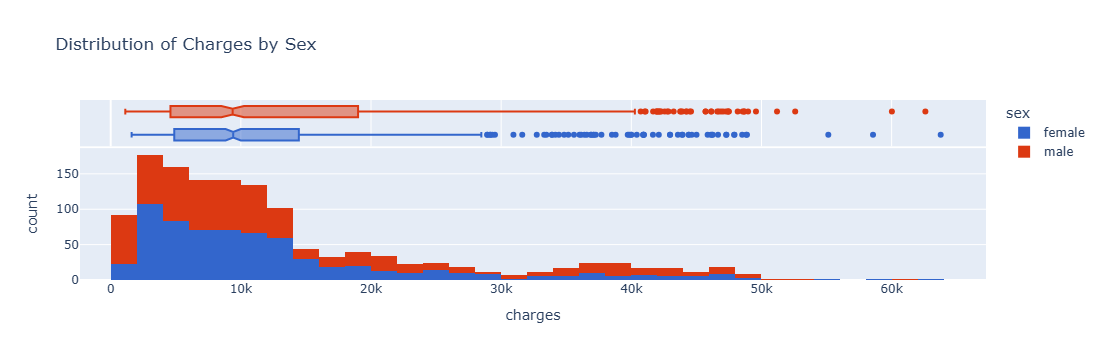

In [49]:
fig = px.histogram(df_medical,
                   x='charges',
                   color='sex',
                   marginal='box',
                   color_discrete_sequence=qualitative.G10,
                   title='Distribution of Charges by Sex')
fig.show()

**Спостереження**

Для більшості клієнтів річні медичні збори становлять менше $10,000. Данні витрат для жіночої статі більше згруповані. Хоча медіанне значення майже не відрізняється, серед чоловіків більше тих, хто платить багато.
Спостерігається невелика друга хвилька на даних між 34к та 50к.

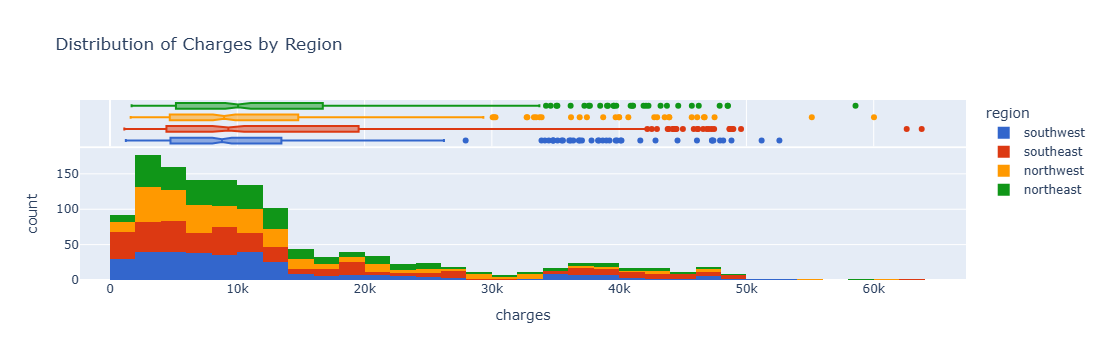

In [47]:
fig = px.histogram(df_medical,
                   x='charges',
                   color='region',
                   marginal='box',
                   color_discrete_sequence=qualitative.G10,
                   title='Distribution of Charges by Region')
fig.show()

**Спостереження**

Медіанні значення відрізняються не сильно. Регіон southwest має більш згруповані дані і меньше викидів. 
Регіон southeast має скошений вправо розподіл, відповідно, там більше людей, які платять більше.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

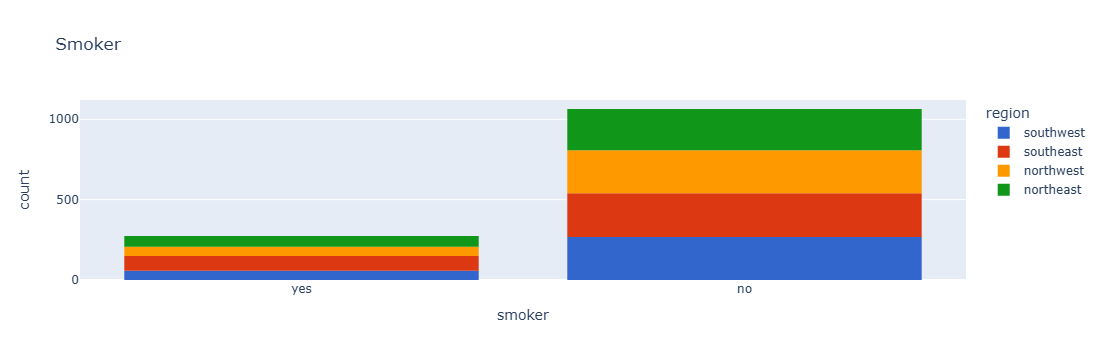

In [61]:
px.histogram(df_medical, x='smoker', color='region', color_discrete_sequence=qualitative.G10, title='Smoker')

**Спостереження**

В регіоні southeast більше курців, що пояснює скошеність даних помічену раніше. Це також можна перевірити побудувавши нормалізовану діаграму

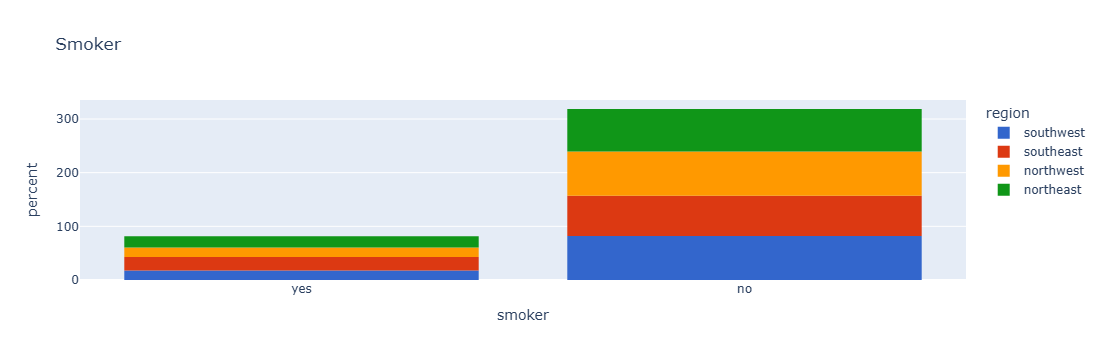

In [63]:
px.histogram(df_medical, x='smoker', color='region', histnorm='percent', color_discrete_sequence=qualitative.G10, title='Smoker')      

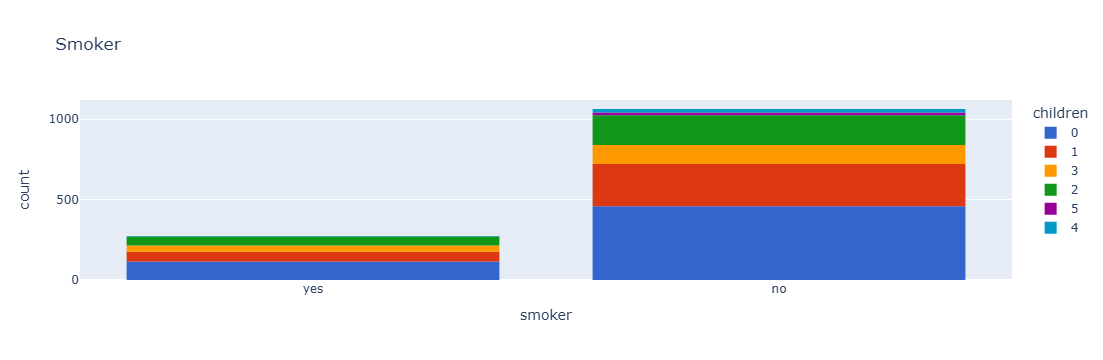

In [70]:
px.histogram(df_medical, x='smoker', color='children', color_discrete_sequence=qualitative.G10, title='Smoker')

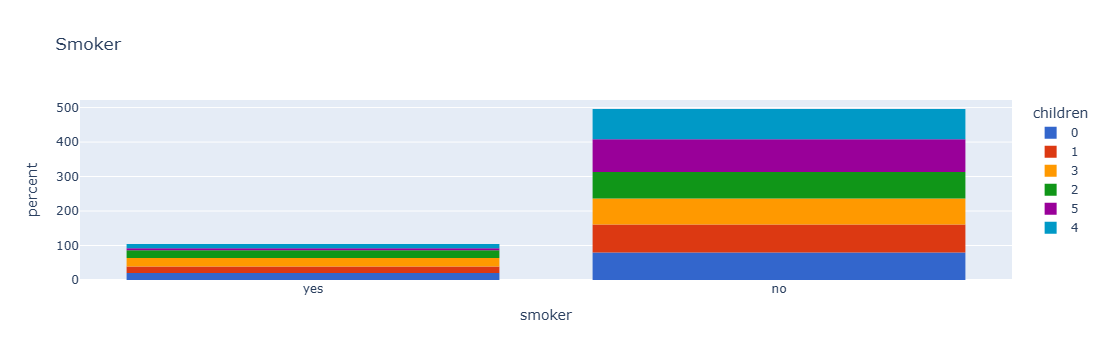

In [72]:
px.histogram(df_medical, x='smoker', color='children', histnorm='percent', color_discrete_sequence=qualitative.G10, title='Smoker')

**Спостереження**

Більшість людей не має дітей. Найбільше курять люди які мають трьох дітей, хоча не можна стверджувати що ця залежність не є випадковою

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

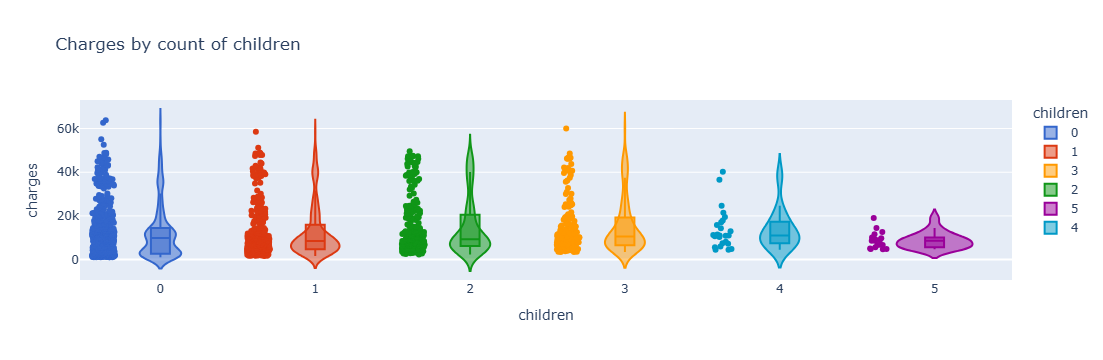

In [171]:
fig = px.violin(df_medical,
                x='children',
                y='charges',
                box=True,  # добавить встроенный боксплот
                points='all',  # показывать все точки
                color='children',  # раскраска по количеству детей
                color_discrete_sequence=qualitative.G10,
                title='Charges by count of children')
fig.show()

**Спостереження**

Серед людей які мають дітей, медіанне значення витрат зростає зі збільшенням кількості дітей

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [83]:
non_smoker_df = df_medical[df_medical.smoker == 'no']

In [85]:
def estimate_charges(age, w, b):
    return w * age + b

In [93]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    plt.show()

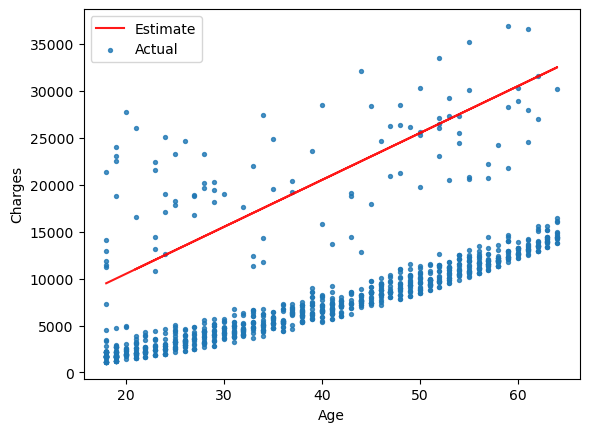

In [133]:
try_parameters(non_smoker_df, 500, 500)

Спробую зменшити w щоб лінія стала більш горизонтальною

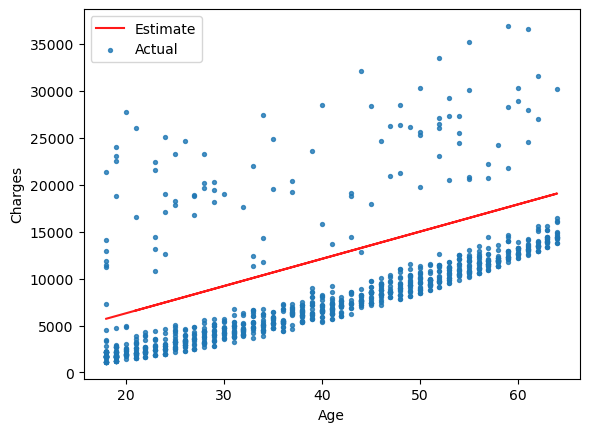

In [165]:
try_parameters(non_smoker_df, 290, 500)

Потрібно зменшити b, щоб опустити лінію нижче до основного скупчення даних

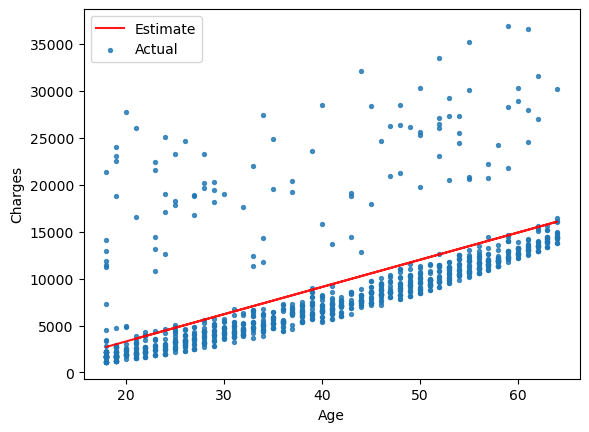

In [167]:
try_parameters(non_smoker_df, 290, -2500)

**Спостереження**

Через те, що дані досить розкидані, неможливо точно підігнати лінію, але на мій погляд вийшло зробити як найточніше.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [173]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [179]:
target = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age, 500, 500)
print(rmse(target, predictions))

13066.50952354755


In [181]:
predictions = estimate_charges(non_smoker_df.age, 290, 500)
print(rmse(target, predictions))

5831.298608899255


In [219]:
predictions = estimate_charges(non_smoker_df.age, 290, -2500)
print(rmse(target, predictions))

4698.847149193415


Найнижче значення втрат на цьому наборі данних близько 4700

Підібрати візуально нахил прямої який максимально повторює тенденцію в даних. Потім змінюючи b на велике число, знайти проміжок значеннь b в якому втрата найменша. Розбити цей проміжок на декілька і знайти серед них найменший і т.д